In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns

from mplsoccer import Pitch

In [2]:
x=np.random.randint(1,101,500)

In [3]:
df=pd.read_csv("E:/important/Coding/Python Coding/Football Analytics/Analytics code/europaFinal.csv")

In [94]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5


In [95]:
Manu_events=df[df['teamId']=='Manchester United']

In [96]:
Manu_events

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
11,0,55.0,Manchester United,70.0,46.7,FirstHalf,Foul,Unsuccessful,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2061,134,7.0,Manchester United,0.0,0.0,PenaltyShootout,PenaltyFaced,Unsuccessful,1.0,NaN,NaN
2063,134,44.0,Manchester United,88.5,50.0,PenaltyShootout,SavedShot,Successful,1.0,NaN,NaN
2066,134,46.0,Manchester United,0.0,0.0,PenaltyShootout,End,Successful,NaN,NaN,NaN
2068,0,0.0,Manchester United,0.0,0.0,PostGame,End,Successful,NaN,NaN,NaN


In [97]:
pass_events=Manu_events[Manu_events['type']=='Pass']

In [98]:
pass_events

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
...,...,...,...,...,...,...,...,...,...,...,...
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0
2008,123,21.0,Manchester United,30.8,88.0,SecondPeriodOfExtraTime,Pass,Successful,17.0,33.4,80.3
2009,123,21.0,Manchester United,33.4,80.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,8.0,27.9,85.9


# Creating a Function 

In [99]:
def create_heat_map(pass_eventsdf,team_id,p_type,ax):
    pass_eventsdf=pass_eventsdf.loc[(pass_eventsdf['teamId']==team_id) & (pass_eventsdf['type']==p_type)]
    kde=sns.kdeplot(x=pass_eventsdf.x,y=pass_eventsdf.y,ax=ax,data=pass_eventsdf,cmap="hot",alpha=0.5,shade=True)
    ax.set_xlim(0, 120)  # Adjust these values based on the pitch dimensions
    ax.set_ylim(0, 80)
    

C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\79162674.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(x=pass_eventsdf.x,y=pass_eventsdf.y,ax=ax,data=pass_eventsdf,cmap="hot",alpha=0.5,shade=True)
C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\79162674.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(x=pass_eventsdf.x,y=pass_eventsdf.y,ax=ax,data=pass_eventsdf,cmap="hot",alpha=0.5,shade=True)


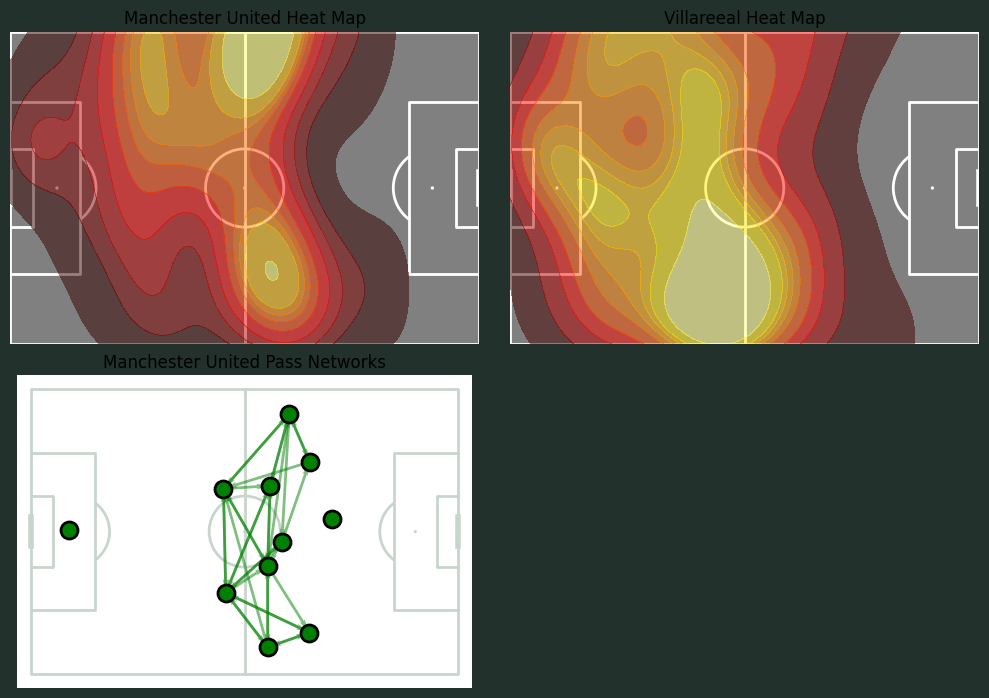

In [124]:
import matplotlib.image as mpimg

img = mpimg.imread('C:/Users/gerald wangai/Desktop/practise 5/build/img/Manchester United.png')


fig=plt.figure(figsize=(10,10),constrained_layout=True)
gs=fig.add_gridspec(nrows=3,ncols=4)

ax5=fig.add_subplot(gs[1,0:2])
ax5.set_title('Manchester United Heat Map')
plt.imshow(img, extent=[0, 0, 0, 1])
pitch=Pitch(pitch_color="grey",line_color="white")
pitch.draw(ax=ax5)

create_heat_map(pass_eventsdf=df,p_type='Pass',team_id='Manchester United',ax=ax5)



ax7=fig.add_subplot(gs[1,2:4])
ax7.set_title("Villareeal Heat Map")
pitch=Pitch(pitch_color="grey",line_color="white")
pitch.draw(ax=ax7)
create_heat_map(pass_eventsdf=df,p_type='Pass',team_id='Villarreal',ax=ax7)



ax9=fig.add_subplot(gs[2,0:2])
ax9.set_title('Manchester United Pass Networks')
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='#c7d5cc')
pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True,ax=ax9)
fig.set_facecolor('#22312b')
arrows = pitch.arrows(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, ax=ax9, width=2, headwidth=2, color="green", alpha=0.5, zorder=1)
nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y, s=150, color="green", edgecolors="black", linewidth=2, alpha=1, zorder=1, ax=ax9)



plt.show()

# PASS NETWORKS

In [101]:
pass_events

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
...,...,...,...,...,...,...,...,...,...,...,...
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0
2008,123,21.0,Manchester United,30.8,88.0,SecondPeriodOfExtraTime,Pass,Successful,17.0,33.4,80.3
2009,123,21.0,Manchester United,33.4,80.3,SecondPeriodOfExtraTime,Pass,Unsuccessful,8.0,27.9,85.9


In [102]:
successful_passes=pass_events[pass_events['outcome']=="Successful"]

In [103]:
successful_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5
...,...,...,...,...,...,...,...,...,...,...,...
1962,119,36.0,Manchester United,42.6,95.4,SecondPeriodOfExtraTime,Pass,Successful,23.0,46.6,75.3
1964,119,38.0,Manchester United,46.6,75.3,SecondPeriodOfExtraTime,Pass,Successful,10.0,45.8,50.9
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0


In [104]:
successful_passes['passer']=successful_passes['playerId']
successful_passes['Recipient']=successful_passes['playerId'].shift(-1)

C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\1727012713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['passer']=successful_passes['playerId']
C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\1727012713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['Recipient']=successful_passes['playerId'].shift(-1)


In [105]:
successful_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,Recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11.0,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23.0,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2.0,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,119,36.0,Manchester United,42.6,95.4,SecondPeriodOfExtraTime,Pass,Successful,23.0,46.6,75.3,23.0,10.0
1964,119,38.0,Manchester United,46.6,75.3,SecondPeriodOfExtraTime,Pass,Successful,10.0,45.8,50.9,10.0,23.0
2004,123,18.0,Manchester United,9.5,100.0,SecondPeriodOfExtraTime,Pass,Successful,23.0,26.6,97.4,23.0,7.0
2007,123,19.0,Manchester United,26.5,97.2,SecondPeriodOfExtraTime,Pass,Successful,7.0,30.8,88.0,7.0,17.0


In [106]:
subs=df[df['type']=='SubstitutionOff']
subs=subs['minute']
firstSub=subs.min()


In [107]:
firstSub

59

In [108]:
successful_passes=successful_passes[successful_passes['minute']<firstSub]

In [109]:
successful_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,Recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18.0,11.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11.0,23.0
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23.0,2.0
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2.0,1.0
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,56,31.0,Manchester United,79.5,5.3,SecondHalf,Pass,Successful,11.0,70.3,7.1,11.0,18.0
974,56,33.0,Manchester United,69.6,2.2,SecondHalf,Pass,Successful,18.0,98.1,10.7,18.0,29.0
975,56,37.0,Manchester United,98.1,10.7,SecondHalf,Pass,Successful,29.0,87.5,63.0,29.0,23.0
976,56,39.0,Manchester United,86.8,63.9,SecondHalf,Pass,Successful,23.0,80.3,30.5,23.0,3.0


In [110]:
passer=pd.to_numeric(successful_passes['passer'],downcast='integer')
recipient=pd.to_numeric(successful_passes['Recipient'],downcast='integer')
successful_passes['passer']=passer
successful_passes['Recipient']=recipient

C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\1723696833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['passer']=passer
C:\Users\gerald wangai\AppData\Local\Temp\ipykernel_5324\1723696833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['Recipient']=recipient


In [111]:
successful_passes

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,Recipient
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,18,11
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4,11,23
52,2,20.0,Manchester United,37.1,97.2,FirstHalf,Pass,Successful,23.0,25.7,82.1,23,2
53,2,22.0,Manchester United,25.7,82.1,FirstHalf,Pass,Successful,2.0,10.1,53.1,2,1
54,2,29.0,Manchester United,10.7,45.5,FirstHalf,Pass,Successful,1.0,15.3,68.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,56,31.0,Manchester United,79.5,5.3,SecondHalf,Pass,Successful,11.0,70.3,7.1,11,18
974,56,33.0,Manchester United,69.6,2.2,SecondHalf,Pass,Successful,18.0,98.1,10.7,18,29
975,56,37.0,Manchester United,98.1,10.7,SecondHalf,Pass,Successful,29.0,87.5,63.0,29,23
976,56,39.0,Manchester United,86.8,63.9,SecondHalf,Pass,Successful,23.0,80.3,30.5,23,3


In [112]:
average_locations=successful_passes.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns=['x','y','count']

In [125]:
average_locations

,x,y,count
passer,,,
1,8.787500,49.362500,8
2,45.573913,71.549275,69
3,45.029167,34.960417,48
6,55.382222,62.013333,45
7,70.500000,45.750000,6
10,65.184615,85.492308,26
11,65.247368,25.515789,19
18,58.703846,53.765385,26
23,55.404348,90.704348,46


In [126]:
pass_between = successful_passes.groupby(['passer', 'Recipient']).size().reset_index(name='pass_count')

In [127]:
pass_between

,passer,Recipient,pass_count
0,1,2,3
1,1,3,1
2,1,18,2
3,1,23,1
4,1,29,1
...,...,...,...
84,39,10,1
85,39,11,3
86,39,18,2
87,39,23,3


In [114]:
pass_between = successful_passes.groupby(['passer', 'Recipient']).size().reset_index(name='pass_count')
pass_between = pass_between.merge(average_locations, left_on='passer', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='Recipient', right_index=True, suffixes=['', '_end'])

In [115]:
pass_between

,passer,Recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,8.7875,49.362500,8,45.573913,71.549275,69
1,1,3,1,8.7875,49.362500,8,45.029167,34.960417,48
2,1,18,2,8.7875,49.362500,8,58.703846,53.765385,26
3,1,23,1,8.7875,49.362500,8,55.404348,90.704348,46
4,1,29,1,8.7875,49.362500,8,60.436111,8.677778,36
...,...,...,...,...,...,...,...,...,...
84,39,10,1,55.9700,33.883333,30,65.184615,85.492308,26
85,39,11,3,55.9700,33.883333,30,65.247368,25.515789,19
86,39,18,2,55.9700,33.883333,30,58.703846,53.765385,26
87,39,23,3,55.9700,33.883333,30,55.404348,90.704348,46


In [116]:
pass_between=pass_between[pass_between['pass_count']>3]

In [117]:
pass_between

,passer,Recipient,pass_count,x,y,count,x_end,y_end,count_end
7,2,3,14,45.573913,71.549275,69,45.029167,34.960417,48
8,2,6,16,45.573913,71.549275,69,55.382222,62.013333,45
10,2,10,4,45.573913,71.549275,69,65.184615,85.492308,26
11,2,18,7,45.573913,71.549275,69,58.703846,53.765385,26
12,2,23,17,45.573913,71.549275,69,55.404348,90.704348,46
14,2,39,5,45.573913,71.549275,69,55.970000,33.883333,30
16,3,2,20,45.029167,34.960417,48,45.573913,71.549275,69
17,3,6,5,45.029167,34.960417,48,55.382222,62.013333,45
22,3,29,8,45.029167,34.960417,48,60.436111,8.677778,36
23,3,39,4,45.029167,34.960417,48,55.970000,33.883333,30


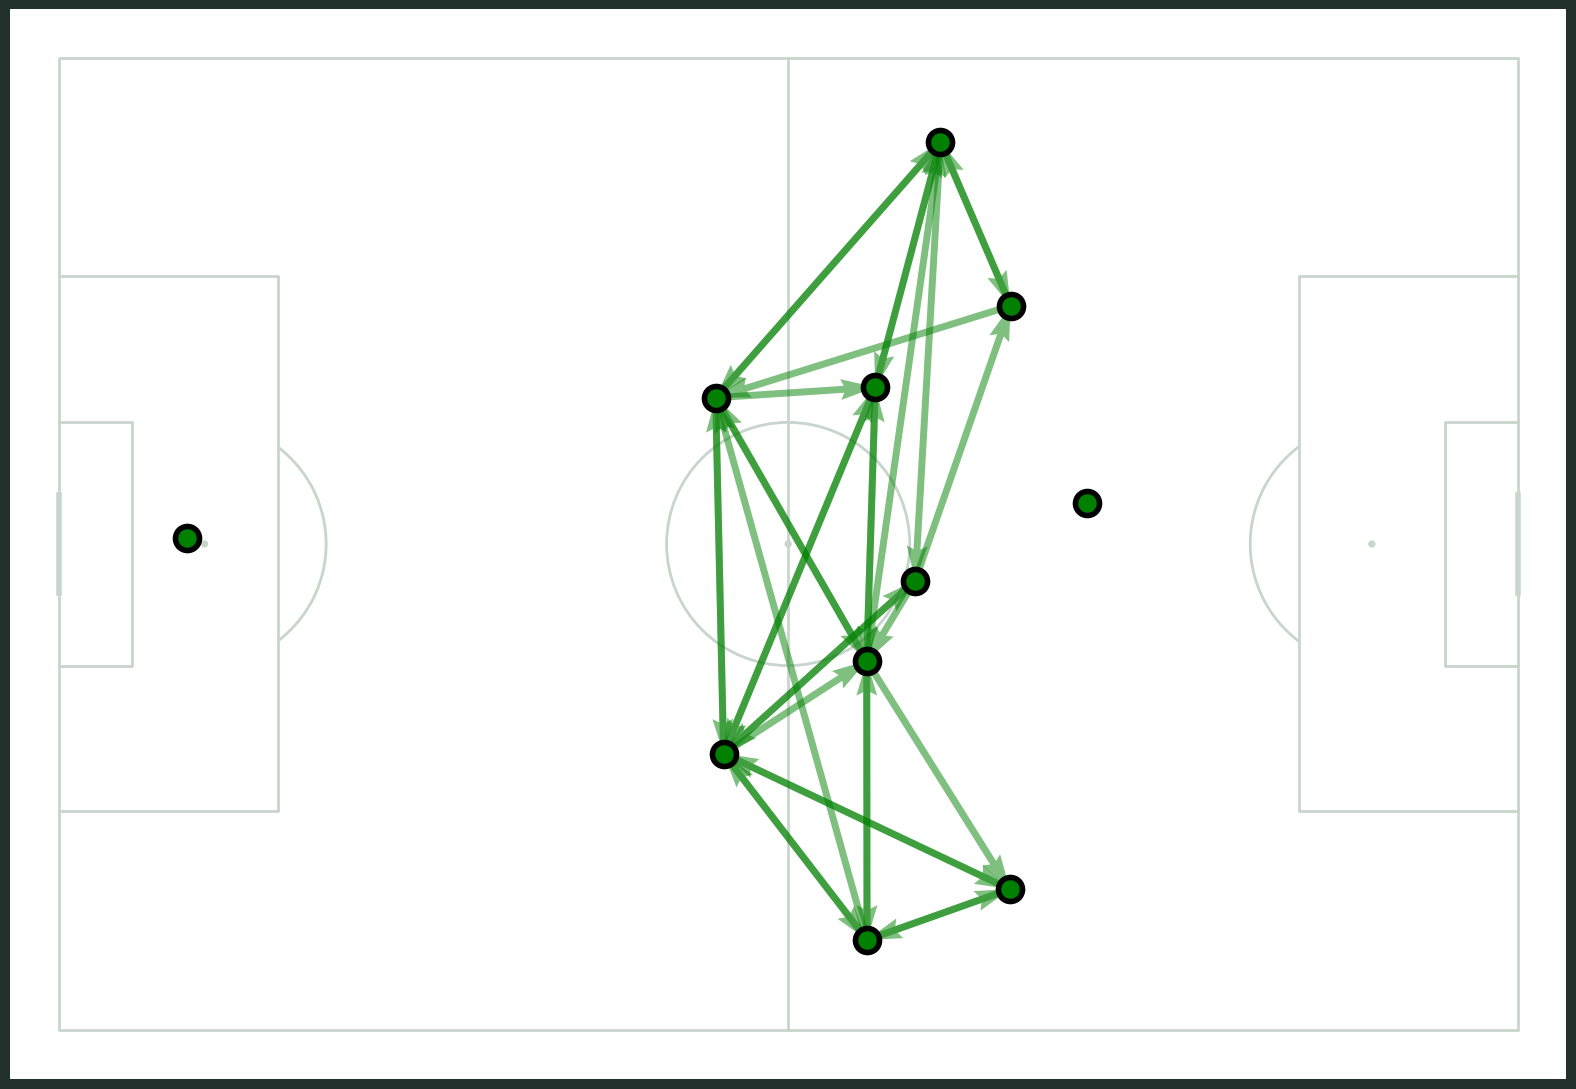

In [118]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Adjust scaling and positioning of arrows
arrows = pitch.arrows(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, ax=ax, width=5, headwidth=3, color="green", alpha=0.5, zorder=1)

# Adjust scaling and positioning of nodes
nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y, s=300, color="green", edgecolors="black", linewidth=4, alpha=1, zorder=1, ax=ax)

In [72]:
Villareal_events=df[df['teamId']=='Villarreal']

In [73]:
Villareal_events

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
6,0,35.0,Villarreal,33.6,2.6,FirstHalf,TakeOn,Unsuccessful,8.0,NaN,NaN
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...
2062,134,44.0,Villarreal,0.0,0.0,PenaltyShootout,PenaltyFaced,Unsuccessful,13.0,NaN,NaN
2064,134,44.0,Villarreal,99.2,50.1,PenaltyShootout,Save,Successful,13.0,NaN,NaN
2065,134,46.0,Villarreal,0.0,0.0,PenaltyShootout,End,Successful,NaN,NaN,NaN
2067,0,0.0,Villarreal,0.0,0.0,PostGame,End,Successful,NaN,NaN,NaN


In [75]:
pass_events=Villareal_events[Villareal_events['type']=='Pass']

In [76]:
pass_events

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4
12,1,5.0,Villarreal,26.1,65.7,FirstHalf,Pass,Successful,4.0,34.0,87.1
...,...,...,...,...,...,...,...,...,...,...,...
1991,121,13.0,Villarreal,77.3,8.6,SecondPeriodOfExtraTime,Pass,Unsuccessful,7.0,81.1,25.3
1993,121,39.0,Villarreal,85.4,0.0,SecondPeriodOfExtraTime,Pass,Successful,2.0,97.4,9.8
1994,121,43.0,Villarreal,98.6,0.8,SecondPeriodOfExtraTime,Pass,Unsuccessful,7.0,98.2,3.1
2011,123,24.0,Villarreal,75.7,12.5,SecondPeriodOfExtraTime,Pass,Successful,2.0,81.0,7.3
